In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
!pip install scipy
import scipy

  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# Import CIFAR10 dataset

In [2]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


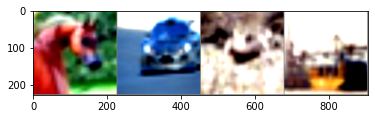

horse   car  frog  ship


In [3]:
import matplotlib.pyplot as plt
import numpy as np

#Function to show some random images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Transfer Learning from ImageNet

In [4]:
trainedModel = models.alexnet(pretrained=True)
untrainedModel = models.alexnet(pretrained=False)

# trainedModel.classifier[4] = nn.Linear(4096,1024)
# trainedModel.classifier[6] = nn.Linear(1024,10)

# trainedModel.classifier[6] = nn.linear(4096, 10)

# untrainedModel.classifier[4] = nn.Linear(4096,1024)
# untrainedModel.classifier[6] = nn.Linear(1024,10)

# untrainedModel.classifier[6] = nn.linear(4096, 10)

trainedModel.classifier = nn.Sequential(*list(trainedModel.classifier) + [nn.Linear(1000, 10)])

untrainedModel.classifier = nn.Sequential(*list(untrainedModel.classifier) + [nn.Linear(1000, 10)])
untrainedModel.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(untrainedModel.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(untrainedModel.parameters(), lr = 0.001)

for epoch in range(5):
  current_loss = 0.0
  correct = 0
  tot = 0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    output = untrainedModel(inputs)
    loss = loss_function(output, labels)
    loss.backward()
    optimizer.step()
    prediction = torch.max(output.data, 1).indices 
    
#     print("pred ", prediction, " labels ", labels)
    current_loss += loss.item()
    for pred, label in zip(prediction, labels):
      tot += 1
      if (pred == label):
        correct += 1 
    print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, current_loss ))
    print("Accuracy: ", correct/tot)
    current_loss = 0.0
#     correct = 0
#     tot = 0

print('Finished Training')

[1,     1] loss: 2.310
Accuracy:  0.0
[1,     2] loss: 2.297
Accuracy:  0.125
[1,     3] loss: 2.294
Accuracy:  0.08333333333333333
[1,     4] loss: 2.306
Accuracy:  0.0625
[1,     5] loss: 2.307
Accuracy:  0.05
[1,     6] loss: 2.296
Accuracy:  0.08333333333333333
[1,     7] loss: 2.304
Accuracy:  0.07142857142857142
[1,     8] loss: 2.311
Accuracy:  0.0625
[1,     9] loss: 2.300
Accuracy:  0.05555555555555555
[1,    10] loss: 2.309
Accuracy:  0.05
[1,    11] loss: 2.302
Accuracy:  0.06818181818181818
[1,    12] loss: 2.295
Accuracy:  0.0625
[1,    13] loss: 2.310
Accuracy:  0.057692307692307696
[1,    14] loss: 2.322
Accuracy:  0.05357142857142857
[1,    15] loss: 2.301
Accuracy:  0.05
[1,    16] loss: 2.301
Accuracy:  0.046875
[1,    17] loss: 2.299
Accuracy:  0.058823529411764705


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        # calculate outputs by running images through the network
        outputs = untrainedModel(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        # calculate outputs by running images through the network
        outputs = trainedModel(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# Transfer Learning from MNIST

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
train_data = datasets.MNIST(root = 'data', train = True, transform = ToTensor(), download = True)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=100,shuffle=True,num_workers=4)
    
test_data = datasets.MNIST(root = 'data', train = False,transform = ToTensor())
test_loader = torch.utils.data.DataLoader(test_data,batch_size=100,shuffle=True,num_workers=4)

5.0%

100.1%

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


3.5%5%

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


100.4%

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


180.4%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [6]:
cnn = CNN()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)

total_step = len(train_loader)
num_epochs = 10
        
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
            

        output = cnn(images)[0]               
        loss = loss_func(output, labels)
            
        # clear gradients for this training step   
        optimizer.zero_grad()           

        # backpropagation, compute gradients 
        loss.backward()    
        # apply gradients             
        optimizer.step()                

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/10], Step [100/600], Loss: 0.2001
Epoch [1/10], Step [200/600], Loss: 0.0517
Epoch [1/10], Step [300/600], Loss: 0.0540
Epoch [1/10], Step [400/600], Loss: 0.0395
Epoch [1/10], Step [500/600], Loss: 0.0515
Epoch [1/10], Step [600/600], Loss: 0.0348
Epoch [2/10], Step [100/600], Loss: 0.0959
Epoch [2/10], Step [200/600], Loss: 0.0951
Epoch [2/10], Step [300/600], Loss: 0.0879
Epoch [2/10], Step [400/600], Loss: 0.0399
Epoch [2/10], Step [500/600], Loss: 0.1312
Epoch [2/10], Step [600/600], Loss: 0.0584
Epoch [3/10], Step [100/600], Loss: 0.0249
Epoch [3/10], Step [200/600], Loss: 0.0156
Epoch [3/10], Step [300/600], Loss: 0.0096
Epoch [3/10], Step [400/600], Loss: 0.0132
Epoch [3/10], Step [500/600], Loss: 0.0665
Epoch [3/10], Step [600/600], Loss: 0.0283
Epoch [4/10], Step [100/600], Loss: 0.0429
Epoch [4/10], Step [200/600], Loss: 0.0625
Epoch [4/10], Step [300/600], Loss: 0.0104
Epoch [4/10], Step [400/600], Loss: 0.0457
Epoch [4/10], Step [500/600], Loss: 0.0108
Epoch [4/10

In [8]:
with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

Test Accuracy of the model on the 10000 test images: 0.98


In [24]:
svhn_transform = transforms.Compose([
#     transforms.Resize(256),
    transforms.CenterCrop(28),
    transforms.Grayscale(),
    transforms.ToTensor(),
])

svhn_data = datasets.SVHN(root = 'data', split = 'test',transform = svhn_transform, download = True)
svhn_loader = torch.utils.data.DataLoader(svhn_data,batch_size=100,shuffle=True,num_workers=0)

Using downloaded and verified file: data/test_32x32.mat


In [32]:
with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in svhn_loader:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

Test Accuracy of the model on the 10000 test images: 0.22
